# INTRODUCTION:

The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. The dataset is chosen from Kaggle. It is of 10k Play Store apps for analyzing the Android market. It consists of in total of 10841 rows and 13 columns.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv('googleplaystore.csv.zip')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
df['Rating']

TypeError: 'numpy.ndarray' object is not callable

### Checking what columns are there in the dataset

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Checking Number of columns and rows

In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Descriptive statistics

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

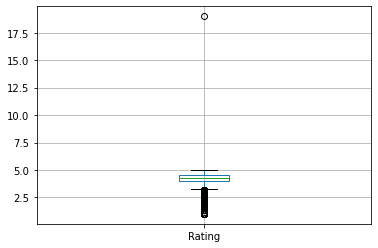

In [7]:
df.boxplot()

ploting a box plot to know the how much outliers are present in my Dataset

### In above boxplot we have only one outlier

Check how many ratings are more than 5-Outliers¶

In [8]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


there is only one outler at loc 10472.Removing 10472 due to data mismatch in the column

In [9]:
df.drop(df.index[10472], inplace=True)

Removing '+' and ',' from the values of number of installs and converting it to numeric

In [10]:
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce')

Removing '$' from the values of Price and converting it to numeric

In [11]:
df['Price']=df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
df['Price']=pd.to_numeric(df['Price'],errors='coerce')

Converting type of Reviews column to numeric

In [12]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [14]:
df['Installs'].min(),df['Installs'].max()

(0, 1000000000)

As we can notice,there is a high variance in the number of installs. To remove this we are adding a new column to dataframe, which is the log of number of installs

In [15]:
df['log_installs'] = np.log10(df['Installs'])

E:\anaconda software\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Checking, if the dataframe contains any duplicate values for the same App name

In [16]:
boolean =df['App'].duplicated().any()
boolean

True

In [17]:
df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
ESPN                                                 7
Candy Crush Saga                                     7
                                                    ..
Break the Egg                                        1
CDL Practice Test 2018 Edition                       1
Antivirus & Mobile Security                          1
Beauty Makeup – Photo Makeover                       1
Living Smart Home                                    1
Name: App, Length: 9659, dtype: int64

As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not

In [18]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,8.0


As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df =df.loc[df.groupby(['App'])['Reviews'].idxmax()]

#### Setting up the parameters for the plots

In [21]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

Q.What are the top 20 apps present in the google play store as per their Genres?

In [22]:
topg=df['Genres'].value_counts()
topg.head(20)

Tools                828
Entertainment        561
Education            510
Business             420
Medical              395
Personalization      376
Productivity         374
Lifestyle            368
Finance              345
Sports               331
Communication        315
Action               299
Health & Fitness     288
Photography          281
News & Magazines     254
Social               239
Books & Reference    222
Travel & Local       218
Shopping             202
Simulation           193
Name: Genres, dtype: int64

In [23]:
top_genres =df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
top_genres

,Genres,Count
0,Tools,828
1,Entertainment,561
2,Education,510
3,Business,420
4,Medical,395
...,...,...
113,Communication;Creativity,1
114,Role Playing;Brain Games,1
115,Arcade;Pretend Play,1
116,Lifestyle;Education,1


In [24]:
genres_installs =df.groupby(['Genres'])[['Installs']].sum()
genres_installs

,Installs
Genres,
Action,3483039190
Action;Action & Adventure,53020500
Adventure,296695320
Adventure;Action & Adventure,106150000
Adventure;Brain Games,100000
...,...
Video Players & Editors,3916902720
Video Players & Editors;Creativity,5000000
Video Players & Editors;Music & Video,15000000


In [25]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)
top_20_genres_installs

,Genres,Count,Installs
0,Tools,828,8092771915
1,Entertainment,561,3014714684
2,Education,510,262910148
3,Business,420,697164865
4,Medical,395,38293077
5,Personalization,376,1532494782
6,Productivity,374,5793091369
7,Lifestyle,368,493823539
8,Finance,345,455348734
9,Sports,331,1412474498


E:\anaconda software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


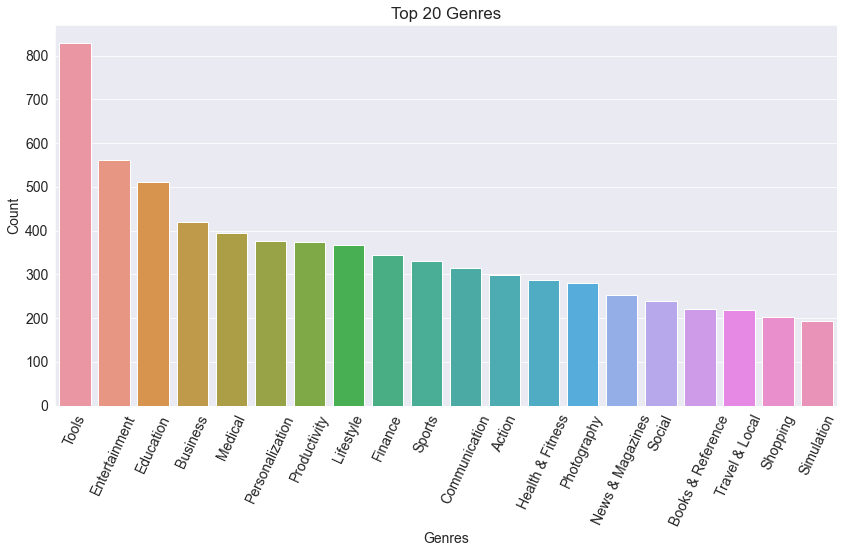

In [26]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

Maxinum number of apps present in google play store comes under Tools

#### Q.Which are the Genres that are getting installed the most in top 20 Genres?

E:\anaconda software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


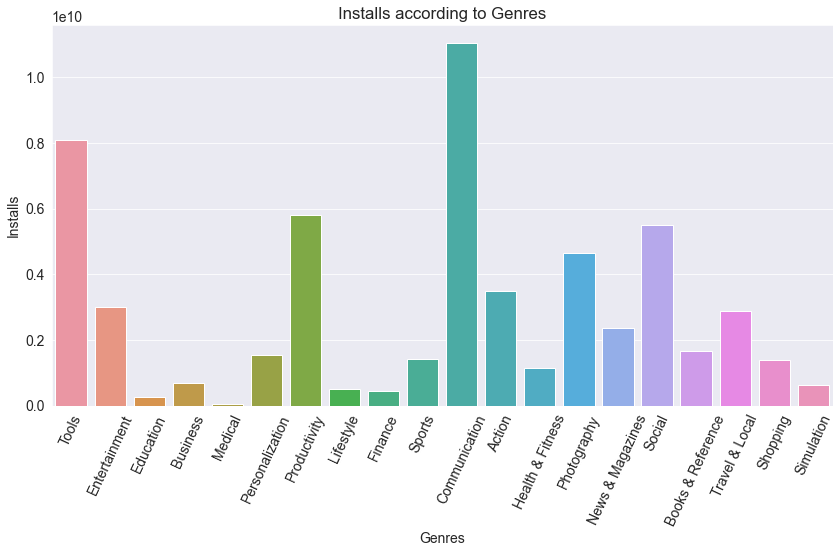

In [27]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

In [28]:
top_category =df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [29]:
category_installs =df.groupby(['Category'])[['Installs']].sum()

In [30]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

E:\anaconda software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


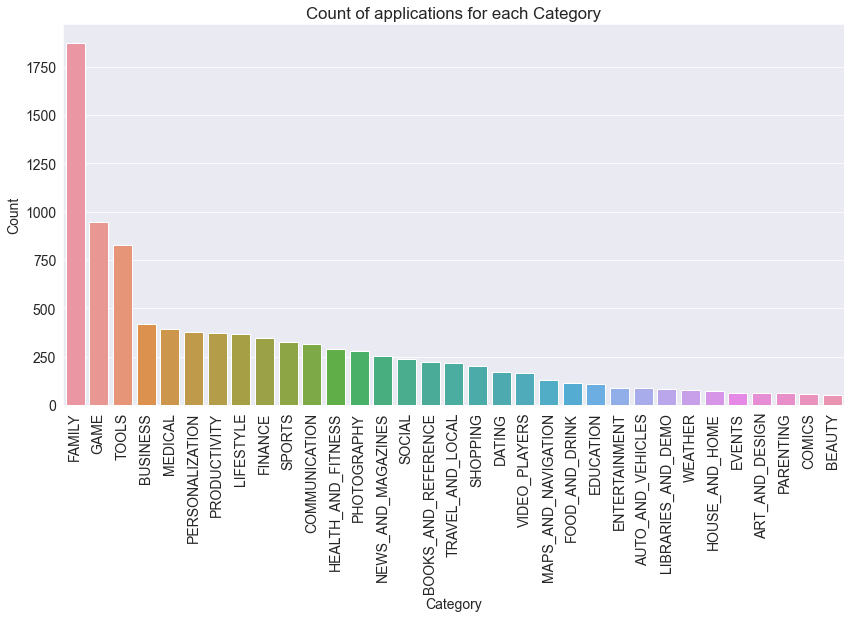

In [31]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

Maxinum number of apps present in google play store comes under Family, Games and Tools Category

E:\anaconda software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


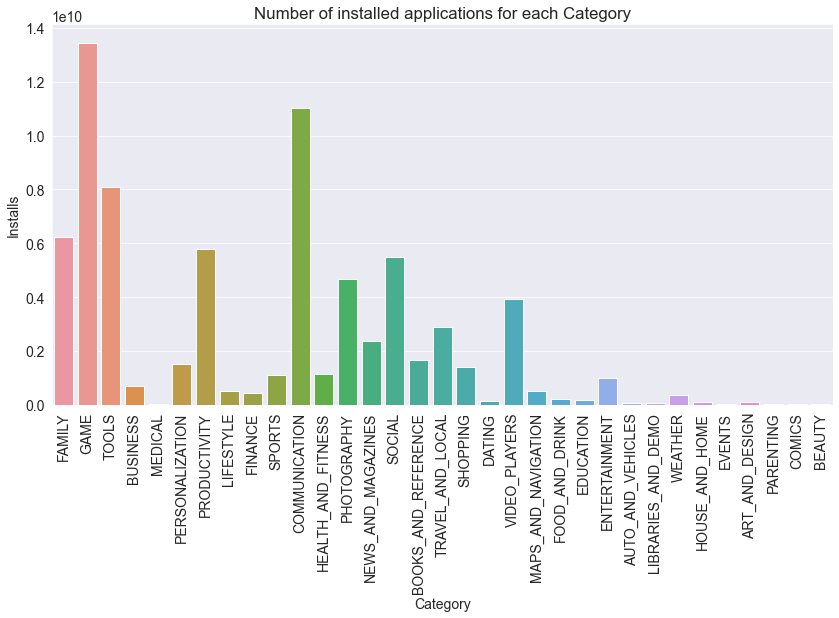

In [32]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games, Communication and Tools.

### Average rating

In [33]:
genres_ratings_df =df.groupby(['Genres'])[['Rating']].mean()

In [34]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [35]:
genres_installs_ratings['Rating'].describe()

count    114.000000
mean       4.248546
std        0.182448
min        3.800000
25%        4.127083
50%        4.246502
75%        4.344442
max        4.800000
Name: Rating, dtype: float64

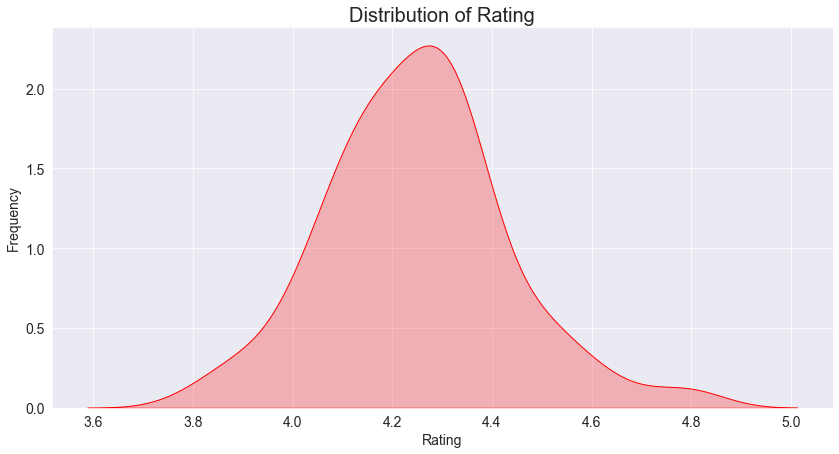

In [36]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

ratigns are normally distributed according to its frequency and highest ratigns to the app in between 4 to 4.8

#### Histogram of size

In [45]:
# to remove null values from size column
df.loc[df['Size'].isnull(),'Size']=0

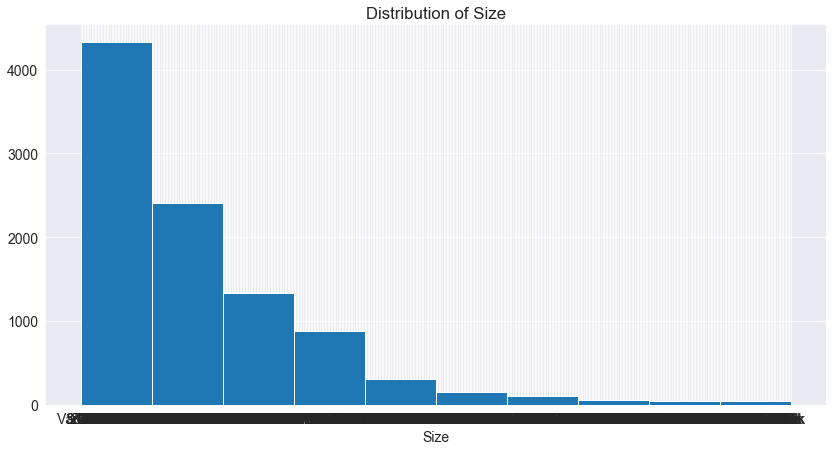

In [47]:
plt.figure(figsize=(14,7))
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(df['Size']);
plt.show()

From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

### Conclusion

The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.